In [1]:
import matplotlib.pyplot as plt
from IPython.display import display
import lamp

stats = lamp.aggregate_results()
display(stats)

,benchmark_name_llm,example_index,num_predicates_llm,num_possible_terms_llm,num_facts_llm,num_rules_llm,total_pos_literals_llm,total_neg_literals_llm,solution_atoms_llm,num_solution_atoms_llm,...,num_facts_original,num_rules_original,total_pos_literals_original,total_neg_literals_original,solution_atoms_original,num_solution_atoms_original,rules_original,facts_original,solution_match,rules_match
0,gpt-oss:20b,0,3,3,4,1,1,0,"{d1(o2), d1(o0), d2(o1), d3(o2), d2(o0)}",5,...,4,1,1,0,"{d1(o2), d1(o0), d2(o1), d3(o2), d2(o0)}",5,[d1(X) :- d3(X).],"[d2(o0), d1(o0), d2(o1), d3(o2)]",True,True
1,gpt-oss:20b,1,3,3,4,1,1,0,"{d1(o2), d2(o2), d0(o1), d0(o0), d0(o2)}",5,...,4,1,2,0,"{d1(o2), d2(o2), d0(o1), d0(o0), d0(o2)}",5,"[d0(X) :- d2(X), d1(X).]","[d0(o1), d2(o2), d1(o2), d0(o0)]",True,False
2,gpt-oss:20b,2,3,3,4,1,1,1,"{d1(o2), d3(o2), d2(o1), d1(o3), d2(o3)}",5,...,4,1,1,1,"{d1(o2), d3(o2), d2(o1), d1(o3), d2(o3)}",5,"[d2(X) :- not d3(X), d1(X).]","[d2(o1), d3(o2), d1(o2), d1(o3)]",True,True
3,gpt-oss:20b,3,4,2,4,1,1,0,"{d1(o2), d1(o0), d3(o2), d2(o2), d0(o2)}",5,...,4,1,3,0,"{d1(o2), d1(o0), d3(o2), d2(o2), d0(o2)}",5,"[d1(X) :- d3(X), d2(X), d0(X).]","[d0(o2), d1(o0), d2(o2), d3(o2)]",True,False
4,gpt-oss:20b,4,3,2,4,1,2,0,"{d1(o2), d0(o3), d3(o3), d2(o3), d0(o2)}",5,...,4,1,2,1,"{d1(o2), d0(o3), d3(o3), d2(o3), d0(o2)}",5,"[d3(X) :- d2(X), d0(X), not d1(X).]","[d0(o3), d0(o2), d2(o3), d1(o2)]",True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,qwen3-coder:30b,115,4,3,4,4,4,0,"{d2(o3), d4(o1), d0(o3), d3(o4)}",4,...,4,2,3,0,"{d4(o3), d0(o3), d3(o4), d4(o1), d2(o3)}",5,"[d0(X) :- d2(X), d4(X)., d4(X) :- d2(X), d0(X).]","[d0(o3), d3(o4), d2(o3), d4(o1)]",False,False
356,qwen3-coder:30b,116,4,2,4,1,2,0,"{d1(o2), d0(o3), d3(o2), d4(o2), d2(o3)}",5,...,4,2,2,2,"{d1(o2), d0(o3), d3(o2), d4(o2), d2(o3)}",5,"[d1(X) :- not d0(X), d4(X)., d4(X) :- d3(X), n...","[d0(o3), d2(o3), d1(o2), d3(o2)]",True,False
357,qwen3-coder:30b,117,3,2,4,4,4,0,"{d3(o1), d1(o4), d2(o1), d3(o4), d4(o1), d2(o4...",10,...,4,2,4,0,"{d3(o1), d4(o1), d0(o1), d1(o1), d0(o4)}",5,"[d0(X) :- d4(X), d3(X), d1(X)., d3(X) :- d4(X)...","[d0(o1), d4(o1), d1(o1), d0(o4)]",False,False
358,qwen3-coder:30b,118,3,3,4,2,2,2,"{d1(o0), d4(o3), d3(o1), d4(o1), d0(o0)}",5,...,4,2,3,1,"{d1(o0), d4(o3), d3(o1), d2(o1), d4(o1), d0(o1)}",6,"[d0(X) :- d2(X), not d1(X), d4(X)., d2(X) :- d...","[d1(o0), d4(o1), d3(o1), d4(o3)]",False,False


In [26]:
# llm_success = stats.groupby(["benchmark_name_llm", "total_pos_literals_llm", "total_neg_literals_llm"])["solution_match"].sum().reset_index()

stats["num_rule_diff"] = stats["num_rules_original"] - stats["num_rules_llm"]
stats["num_literals_original"] = stats["total_pos_literals_original"] + stats["total_neg_literals_original"]
stats["num_literals_llm"] = (stats["total_pos_literals_llm"] + stats["total_neg_literals_llm"])
stats["num_pred_diff"] = stats["num_literals_original"] - stats["num_literals_llm"]

literal_effects = stats.groupby(["benchmark_name_llm", "solution_match"]).agg(
    count_correct=("benchmark_name_llm", "count"),
    count_rules_match=("rules_match", "sum")
).reset_index()
display(literal_effects)


,benchmark_name_llm,solution_match,count_correct,count_rules_match
0,gpt-5-mini,False,1,0
1,gpt-5-mini,True,119,11
2,gpt-oss:20b,False,4,0
3,gpt-oss:20b,True,116,11
4,qwen3-coder:30b,False,67,0
5,qwen3-coder:30b,True,53,1


In [ ]:

rules_effects = stats.groupby(["benchmark_name_llm", "solution_match", "num_rule_diff"]).agg(
    count=("benchmark_name_llm", "count")
).reset_index()
display(rules_effects)

,benchmark_name_llm,solution_match,num_rule_diff,count
0,gpt-5-mini,False,0,1
1,gpt-5-mini,True,0,59
2,gpt-5-mini,True,1,36
3,gpt-5-mini,True,2,24
4,gpt-oss:20b,False,0,2
5,gpt-oss:20b,False,1,2
6,gpt-oss:20b,True,0,58
7,gpt-oss:20b,True,1,34
8,gpt-oss:20b,True,2,24
9,qwen3-coder:30b,False,-6,1


In [37]:
literal_effects = stats.groupby(["benchmark_name_llm", "solution_match", "num_literals_original", "num_literals_llm"]).agg(
    count=("benchmark_name_llm", "count")
).reset_index()
display(literal_effects)

,benchmark_name_llm,solution_match,num_literals_original,num_literals_llm,count
0,gpt-5-mini,False,3,3,1
1,gpt-5-mini,True,1,1,5
2,gpt-5-mini,True,1,2,3
3,gpt-5-mini,True,1,3,1
4,gpt-5-mini,True,2,1,14
...,...,...,...,...,...
93,qwen3-coder:30b,True,5,5,1
94,qwen3-coder:30b,True,6,1,1
95,qwen3-coder:30b,True,6,2,2
96,qwen3-coder:30b,True,7,2,2


{'qwen3-coder:30b', 'gpt-5-mini', 'gpt-oss:20b'}


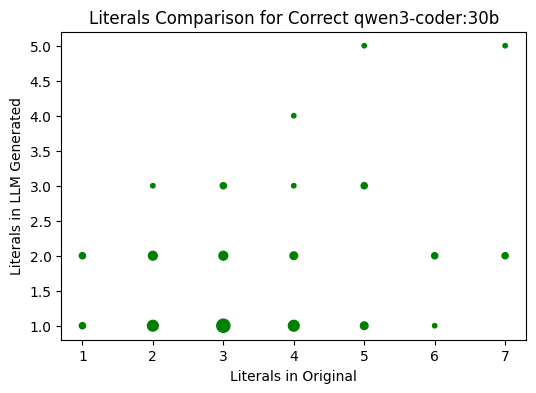

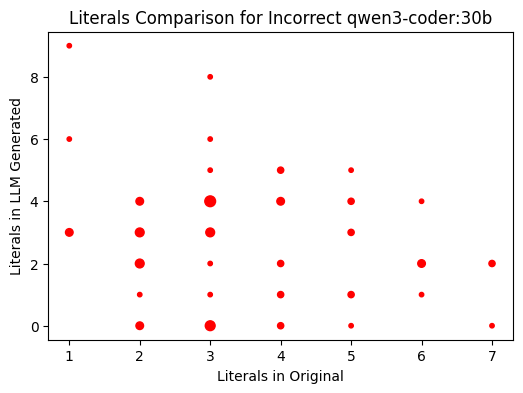

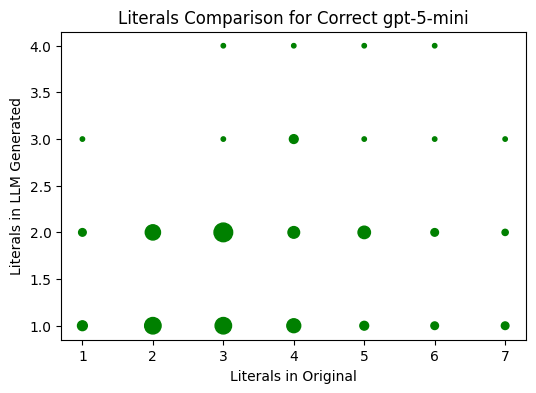

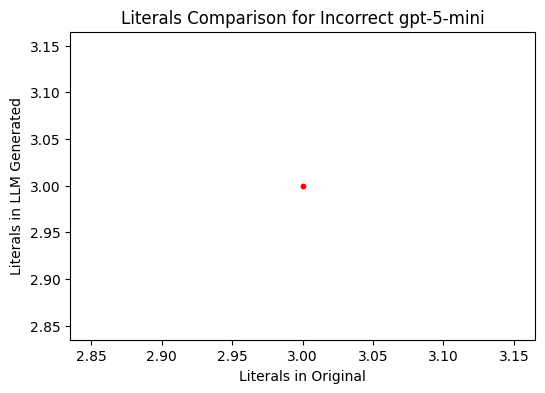

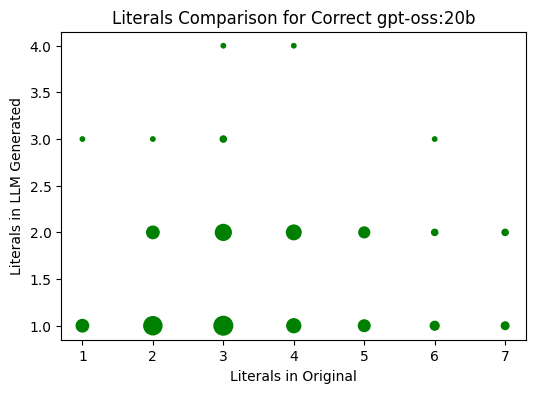

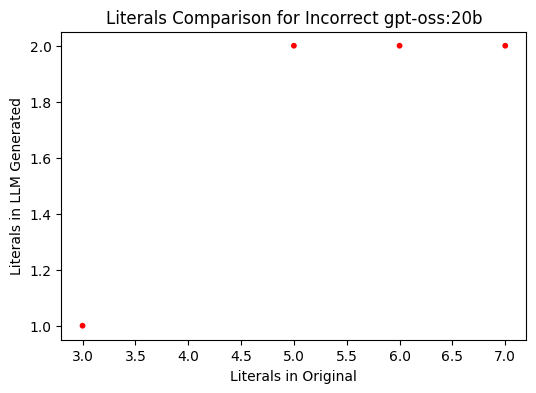

In [ ]:
# Benchmark: benchmark_name_llm: qwen3-coder:30b
# Color: solution_match: True

for benchmark in set(literal_effects["benchmark_name_llm"]):

    for status in [True, False]:

        filtered = literal_effects[((literal_effects["solution_match"]) == status) & (literal_effects["benchmark_name_llm"] == benchmark)]

        # Y: num_literals_original
        # X: num_literals_llm
        # Size: count

        status_str = "Correct" if status else "Incorrect"

        plt.figure(figsize=(6,4))
        plt.scatter(x=filtered["num_literals_original"], y=filtered["num_literals_llm"], s=filtered["count"] * 10, c="green" if status else "red")
        plt.xlabel("Literals in Original")
        plt.ylabel("Literals in LLM Generated")
        plt.title(f"Literals Comparison for {status_str} {benchmark}")
        plt.savefig(f"diagrams/{status_str}_{benchmark}.pdf") 


In [ ]:


# Sample data
x = stats["total_pos_literals_llm"]
y = stats["total_pos_literals_original"]

# Create scatter plot
plt.scatter(x, y)

# Add labels and title
plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.title("Simple Scatter Plot")

# Display the plot
plt.show()